In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import ttest_ind, chi2_contingency
from operator import attrgetter
import warnings
warnings.filterwarnings('ignore')


In [51]:
customers= pd.read_csv('Customers (2).csv')
discount = pd.read_csv('Discount_Coupon.csv')
marketing = pd.read_csv('Marketing_Spend.csv')
online_sales = pd.read_csv('Online_Sales.csv')
tax_amt = pd.read_csv('Tax_amount.csv')


## Intital Analysis

In [52]:
customers.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [53]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [54]:
customers.isna().sum()/len(customers)*100

CustomerID       0.0
Gender           0.0
Location         0.0
Tenure_Months    0.0
dtype: float64

In [55]:
customers.duplicated().sum()

0

In [56]:
marketing.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [57]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [58]:
marketing.isna().sum()/len(marketing)*100

Date             0.0
Offline_Spend    0.0
Online_Spend     0.0
dtype: float64

In [59]:
marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
Offline_Spend,365.0,2843.561644,952.292448,500.00,2500.0,3000.00,3500.00,5000.00
Online_Spend,365.0,1905.880740,808.856853,320.25,1258.6,1881.94,2435.12,4556.93


In [60]:
discount.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [61]:
discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [62]:
discount.isna().sum()/len(discount)*100

Month               0.0
Product_Category    0.0
Coupon_Code         0.0
Discount_pct        0.0
dtype: float64

In [63]:
discount.describe().T

,count,mean,std,min,25%,50%,75%,max
Discount_pct,204.0,20.0,8.185052,10.0,10.0,20.0,30.0,30.0


In [64]:
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [65]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [66]:
online_sales.isna().sum()/len(online_sales)*100

CustomerID             0.0
Transaction_ID         0.0
Transaction_Date       0.0
Product_SKU            0.0
Product_Description    0.0
Product_Category       0.0
Quantity               0.0
Avg_Price              0.0
Delivery_Charges       0.0
Coupon_Status          0.0
dtype: float64

In [67]:
online_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,52924.0,15346.709810,1766.556020,12346.00,13869.0,15311.00,16996.25,18283.00
Transaction_ID,52924.0,32409.825675,8648.668977,16679.00,25384.0,32625.50,39126.25,48497.00
Quantity,52924.0,4.497638,20.104711,1.00,1.0,1.00,2.00,900.00
Avg_Price,52924.0,52.237646,64.006882,0.39,5.7,16.99,102.13,355.74
Delivery_Charges,52924.0,10.517630,19.475613,0.00,6.0,6.00,6.50,521.36


In [68]:
tax_amt.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


In [69]:
tax_amt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Category  20 non-null     object
 1   GST               20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [70]:
tax_amt.isna().sum()

Product_Category    0
GST                 0
dtype: int64

In [71]:
tax_amt.describe().T

,count,unique,top,freq
Product_Category,20,20,Nest-USA,1
GST,20,4,10%,7


## Non Graphical Analyisis

In [72]:
customers.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [73]:
customers['Gender'].value_counts(normalize=True)*100

Gender
F    63.623978
M    36.376022
Name: proportion, dtype: float64

In [74]:
customers['Location'].value_counts(normalize=True)*100

Location
California       31.607629
Chicago          31.062670
New York         22.070845
New Jersey       10.149864
Washington DC     5.108992
Name: proportion, dtype: float64

In [75]:
customers['Tenure_Months'].min(),customers['Tenure_Months'].max()

(2, 50)

In [76]:
online_sales['CustomerID'].value_counts().iloc[:10]

CustomerID
12748    695
15311    587
14606    575
17841    572
14911    523
13089    366
15039    315
17850    297
14646    290
13081    261
Name: count, dtype: int64

### Outlier detection

Number of outliers in Quantity coulmn are : 471 
Number of outliers in Avg_Price coulmn are : 728 
Number of outliers in Delivery_Charges coulmn are : 722 


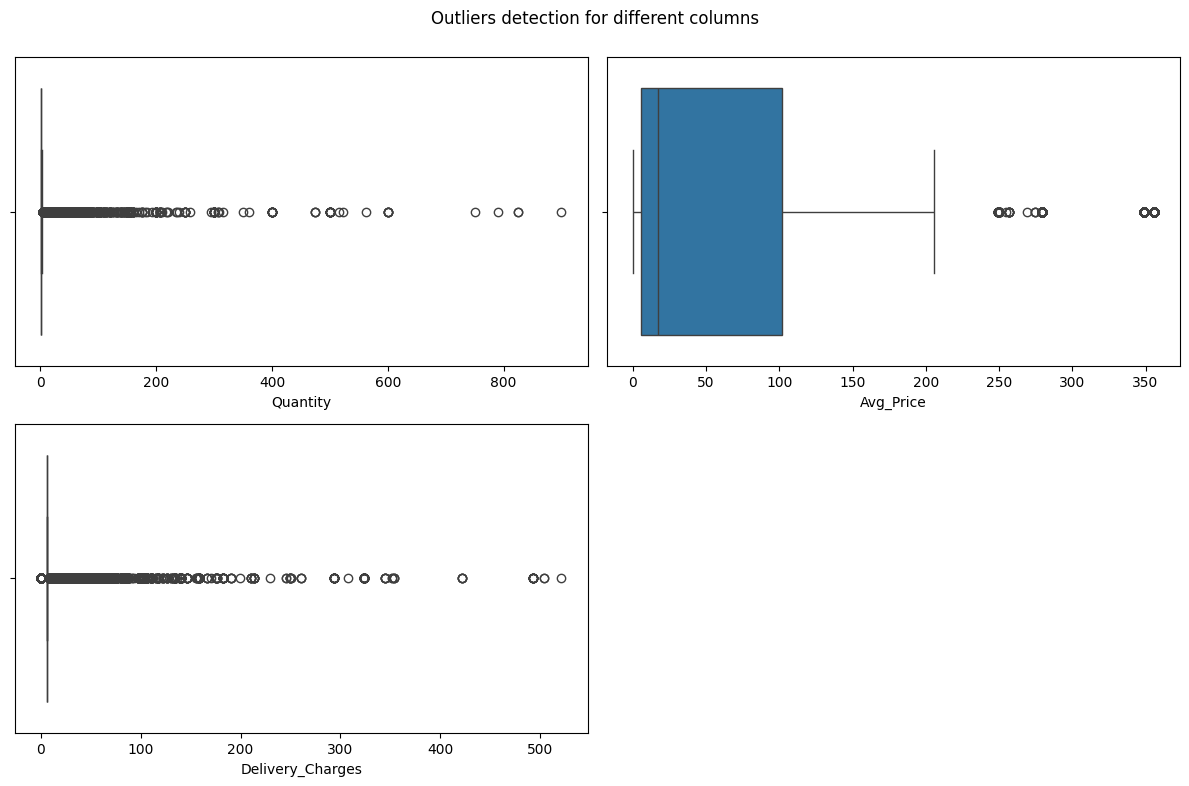

In [77]:
cols= ['Quantity','Avg_Price','Delivery_Charges']
c=1
plt.figure(figsize = (12, 16))
for col in cols:
  z_scores = scipy.stats.zscore(online_sales[col])
  outliers = np.where((z_scores < -3) | (z_scores > 3))[0]
  plt.subplot(4,2,c)
  sns.boxplot(x= online_sales[col])
  c+=1
  print(f'Number of outliers in {col} coulmn are : {len(outliers)} ')

plt.suptitle('Outliers detection for different columns',y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [78]:
online_sales.groupby('Product_Category')['CustomerID'].nunique()

Product_Category
Accessories              150
Android                   42
Apparel                 1323
Backpacks                 75
Bags                     728
Bottles                  203
Drinkware                919
Fun                      118
Gift Cards                77
Google                    89
Headgear                 425
Housewares               107
Lifestyle                817
More Bags                 37
Nest                     516
Nest-Canada              205
Nest-USA                1260
Notebooks & Journals     383
Office                  1103
Waze                     309
Name: CustomerID, dtype: int64

## Exploratory Data Analysis (EDA)

In [79]:
# Merge onlinesales with customer
merged_cust_sales = pd.merge(online_sales,customers,on='CustomerID',how='left')


In [80]:
# coverting dtype of transcation_date
merged_cust_sales['Transaction_Date']= pd.to_datetime(merged_cust_sales['Transaction_Date'])

In [81]:
merged_cust_sales.groupby('Gender')['Transaction_ID'].nunique()

Gender
F    15971
M     9770
Name: Transaction_ID, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


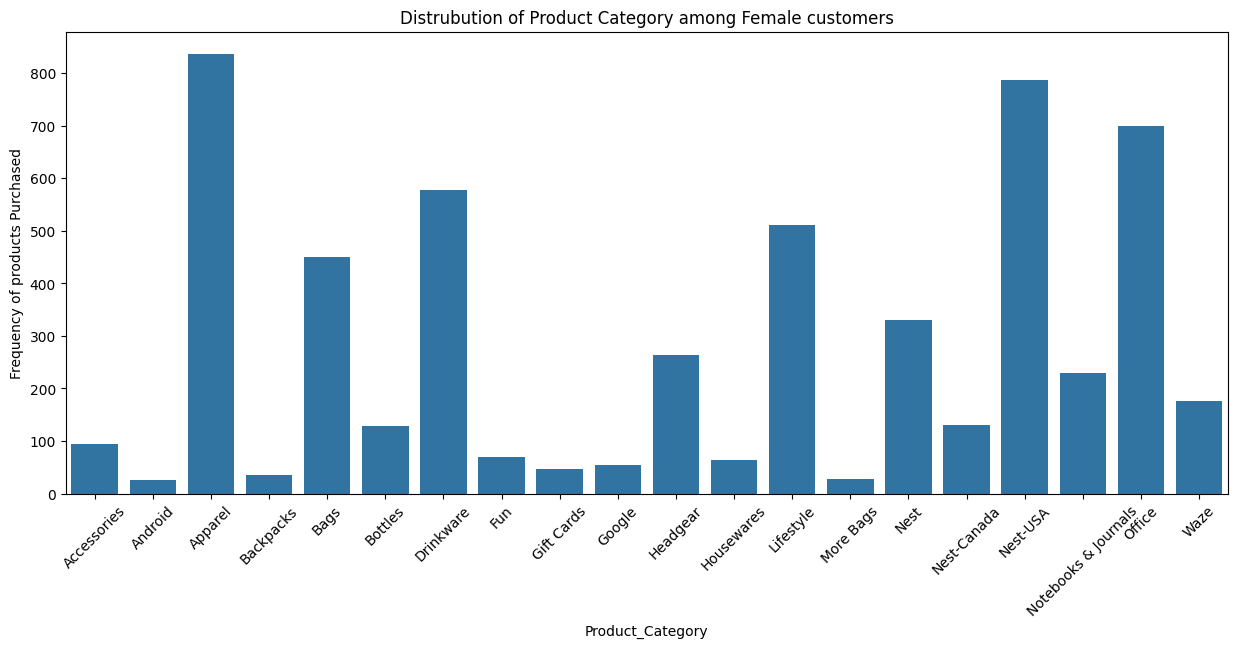

In [142]:
df= pd.DataFrame(merged_cust_sales[merged_cust_sales['Gender']=='F'].groupby('Product_Category')['CustomerID'].nunique())
plt.figure(figsize=(15,6))
sns.barplot(data=df,x='Product_Category',y='CustomerID')
plt.title('Distrubution of Product Category among Female customers')
plt.ylabel('Frequency of products Purchased')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


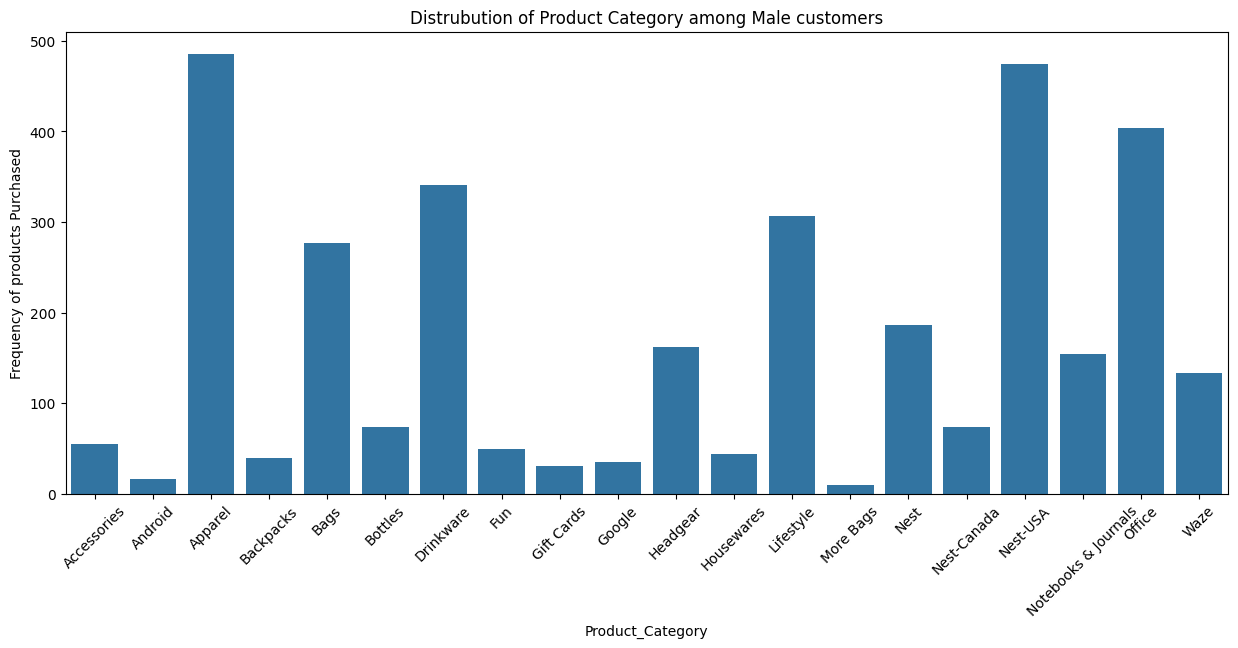

In [140]:
df= pd.DataFrame(merged_cust_sales[merged_cust_sales['Gender']=='M'].groupby('Product_Category')['CustomerID'].nunique())
plt.figure(figsize=(15,6))
sns.barplot(data=df,x='Product_Category',y='CustomerID')
plt.title('Distrubution of Product Category among Male customers')
plt.ylabel('Frequency of products Purchased')
plt.xticks(rotation=45)
plt.show()

In [82]:
merged_cust_sales.groupby('Transaction_Date')['Transaction_ID'].nunique()

Transaction_Date
2019-01-01     41
2019-01-02     71
2019-01-03    124
2019-01-04     89
2019-01-05     91
             ... 
2019-12-27     68
2019-12-28     52
2019-12-29     65
2019-12-30     44
2019-12-31     45
Name: Transaction_ID, Length: 365, dtype: int64

In [83]:
merged_cust_sales.groupby('Product_SKU')['Transaction_ID'].nunique()

Product_SKU
GGOEA0CH077599     16
GGOEAAAB034813     18
GGOEAAAB034814     43
GGOEAAAB034815     31
GGOEAAAB034816     22
                 ... 
GGOEYOCR077399     24
GGOEYOCR077799     61
GGOEYOCR078099     33
GGOEYOLR018699    126
GGOEYOLR080599     32
Name: Transaction_ID, Length: 1145, dtype: int64

In [84]:
# extract month
merged_cust_sales['month'] = merged_cust_sales['Transaction_Date'].dt.month_name()

merged_cust_sales.groupby('month')['Transaction_ID'].nunique()

month
April        1813
August       2414
December     2684
February     1664
January      2102
July         2080
June         1940
March        1991
May          2034
November     2282
October      2125
September    1932
Name: Transaction_ID, dtype: int64

In [145]:
merged_cust_sales.groupby(['Product_Category','Location'])['CustomerID'].nunique().unstack()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Location,California,Chicago,New Jersey,New York,Washington DC
Product_Category,,,,,
Accessories,48,50,13,32,7
Android,13,17,4,7,1
Apparel,415,404,139,295,70
Backpacks,25,27,6,14,3
Bags,222,245,67,152,42
Bottles,65,63,20,46,9
Drinkware,294,287,86,205,47
Fun,32,38,12,28,8
Gift Cards,21,34,7,14,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


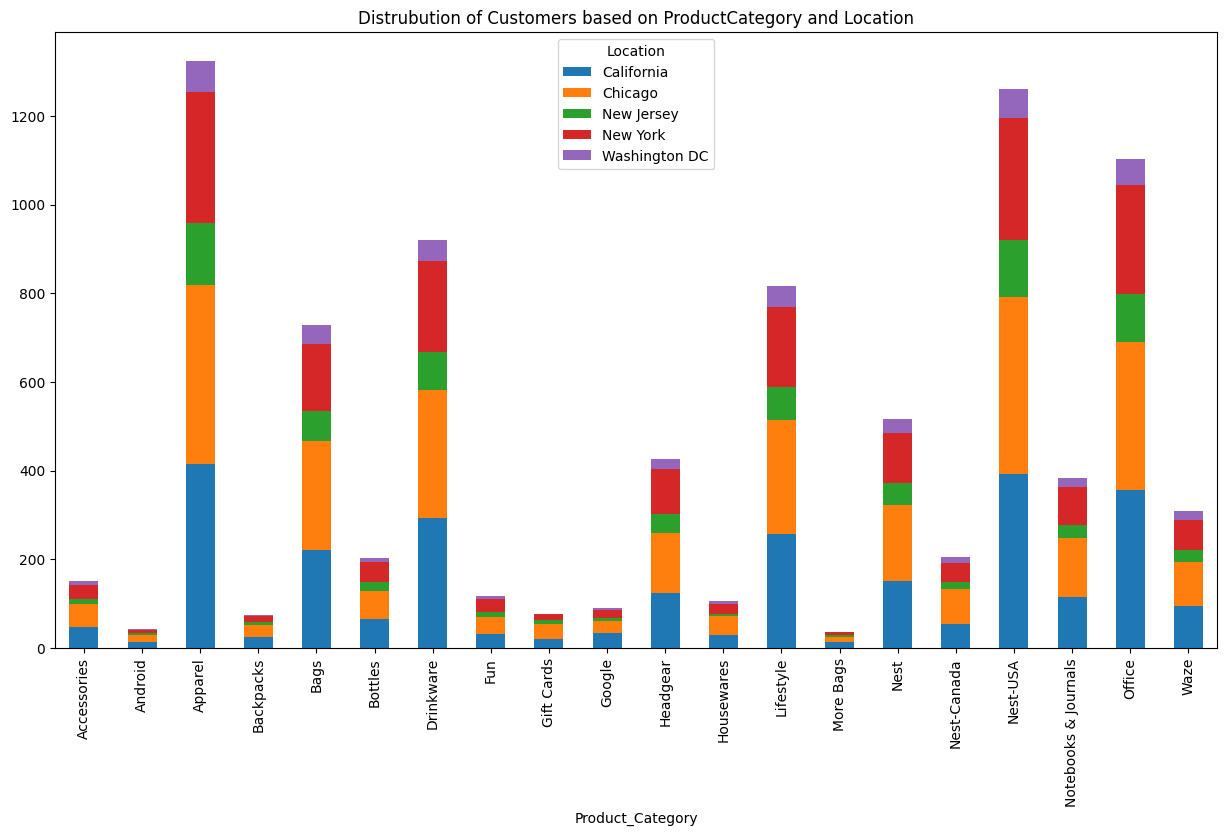

In [150]:
merged_cust_sales.groupby(['Product_Category','Location'])['CustomerID'].nunique().unstack().plot(kind='bar',stacked=True,figsize=(15,8))
plt.title('Distrubution of Customers based on ProductCategory and Location')
plt.show()

In [149]:
merged_cust_sales.groupby(['Product_Category','Location'])['Transaction_ID'].nunique().unstack()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Location,California,Chicago,New Jersey,New York,Washington DC
Product_Category,,,,,
Accessories,68,68,13,37,7
Android,13,18,4,7,1
Apparel,2596,2906,761,1838,452
Backpacks,27,32,8,14,3
Bags,451,596,133,321,67
Bottles,88,81,25,54,11
Drinkware,792,929,216,519,122
Fun,41,52,12,31,11
Gift Cards,27,87,18,24,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


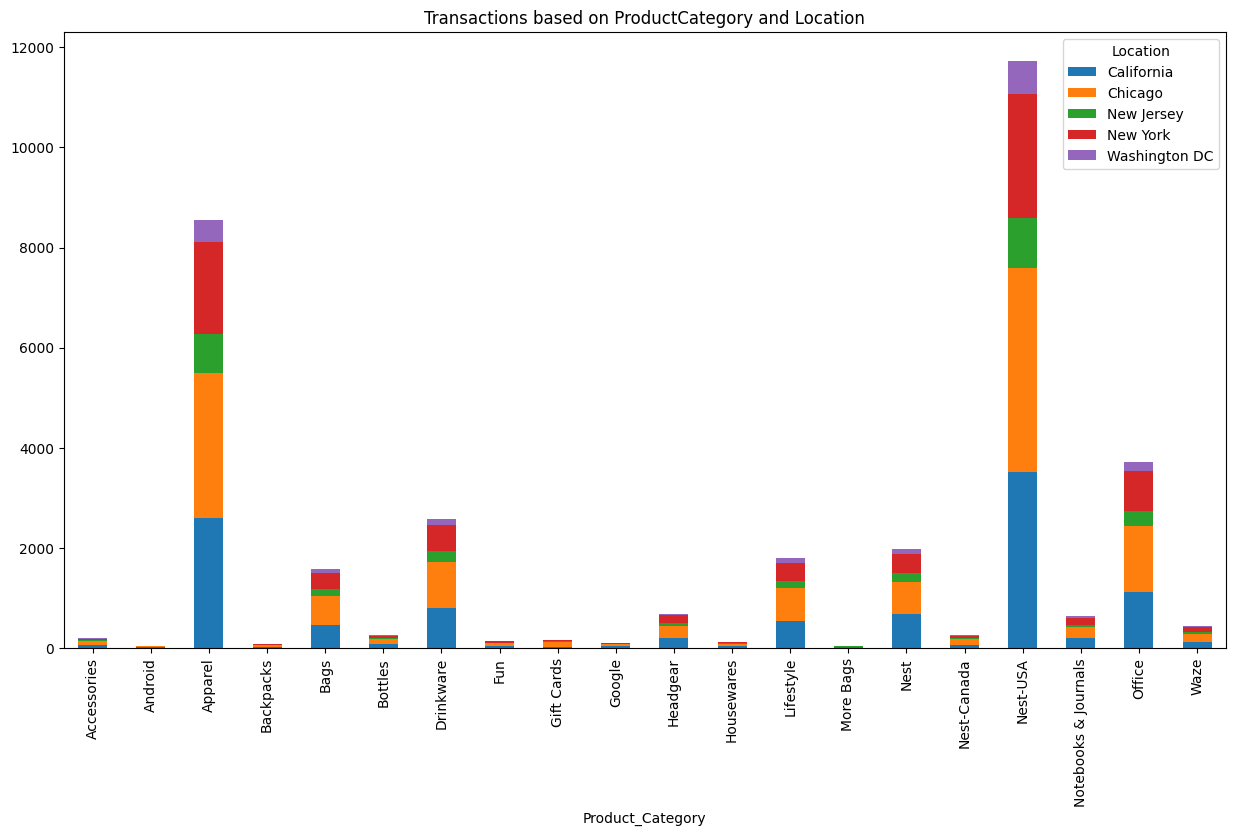

In [148]:
merged_cust_sales.groupby(['Product_Category','Location'])['Transaction_ID'].nunique().unstack().plot(kind='bar',stacked=True,figsize=(15,8))
plt.title('Transactions based on ProductCategory and Location')
plt.show()

In [86]:
# Segmenting the customers based on tenure .

def tenure_seg(x):
  if x <=2:
    return '0-2 months'
  elif x>2 and x<=6:
    return '2-6 months'
  elif x>6 and x<=12:
    return '6-12 months'
  elif x>12 and x<=24:
    return '12-24 months'
  elif x>24 and x<=36:
    return '24-36 months'
  else:
    return '36-50 months'

merged_cust_sales['Tenure'] = merged_cust_sales['Tenure_Months'].apply(tenure_seg)

In [87]:
merged_cust_sales.groupby('Tenure')['CustomerID'].nunique()

Tenure
0-2 months       26
12-24 months    361
2-6 months      127
24-36 months    366
36-50 months    414
6-12 months     174
Name: CustomerID, dtype: int64

In [88]:
merged_cust_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,month,Tenure
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,January,6-12 months
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,January,6-12 months
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,January,6-12 months
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,M,Chicago,12,January,6-12 months
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,January,6-12 months


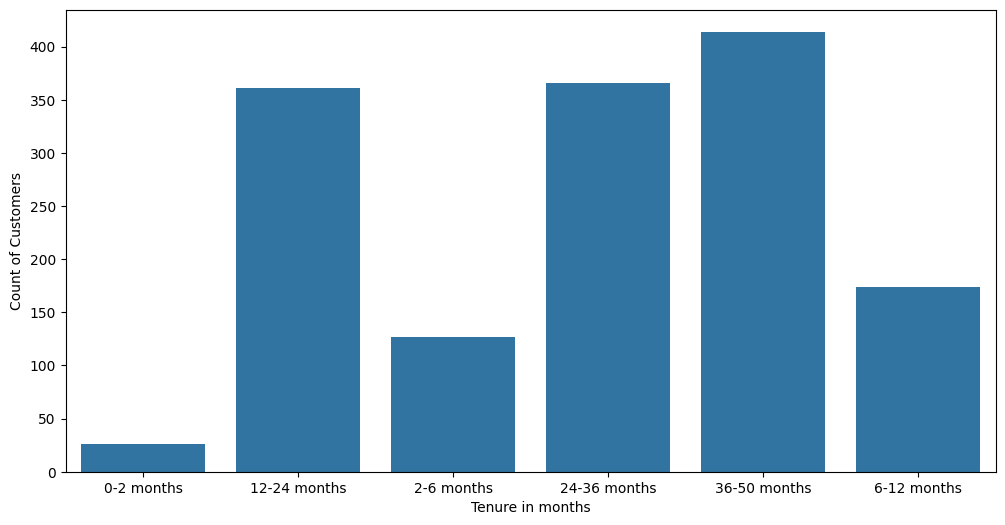

In [89]:
df= pd.DataFrame(merged_cust_sales.groupby('Tenure')['CustomerID'].nunique())
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='Tenure',y='CustomerID')
plt.xlabel('Tenure in months')
plt.ylabel('Count of Customers')
plt.show()

<Axes: xlabel='Tenure'>

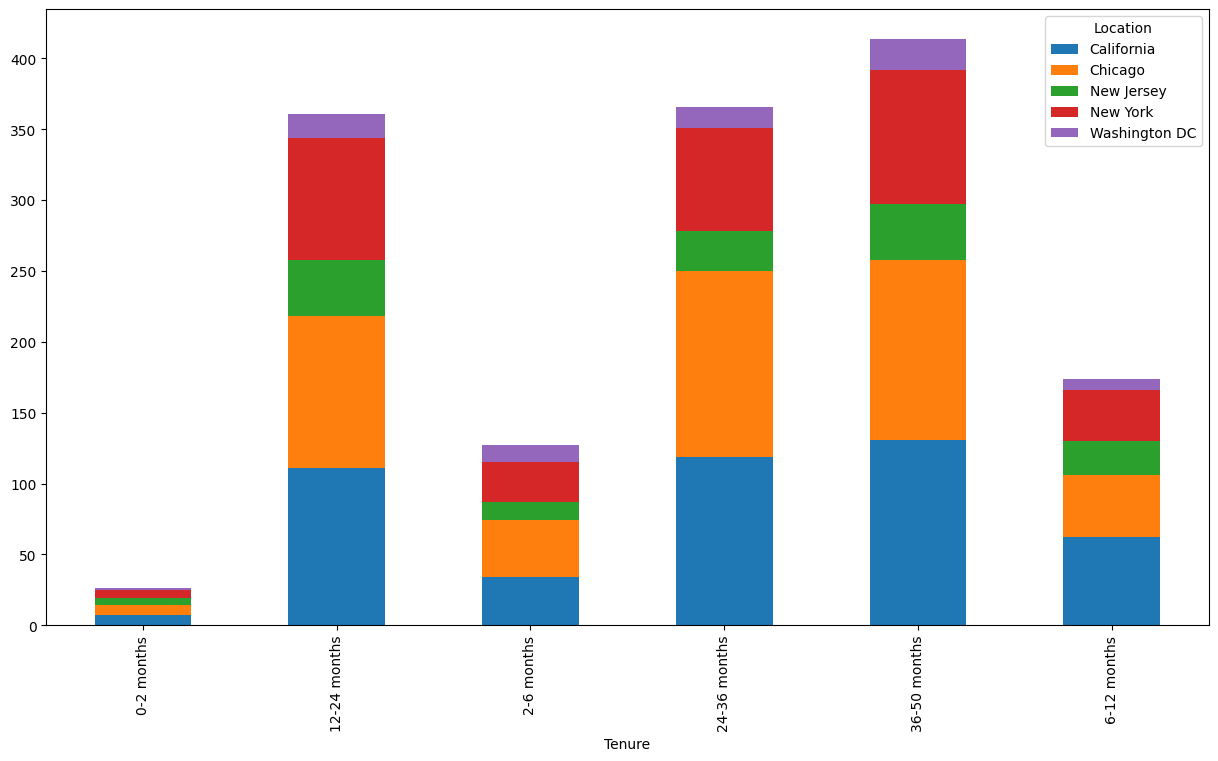

In [90]:
merged_cust_sales.groupby(['Tenure','Location'])['CustomerID'].nunique().unstack().plot(kind='bar',stacked=True,figsize=(15,8))

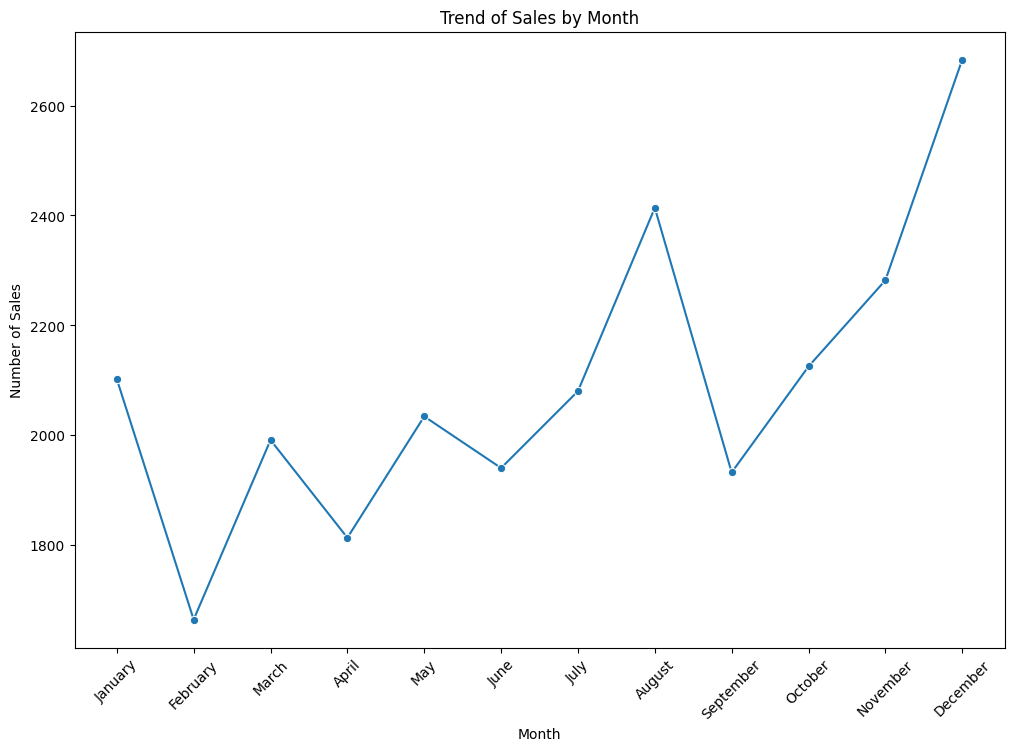

In [91]:
df= pd.DataFrame(merged_cust_sales.groupby('month')['Transaction_ID'].nunique()).reset_index()#.sort_values(by='month',ascending=False)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'August', 'September', 'October', 'November', 'December'
]

# Convert 'month' to a categorical type with the defined order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df = df.sort_values(by='month').reset_index(drop=True)
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='month', y='Transaction_ID', marker='o')
plt.title('Trend of Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

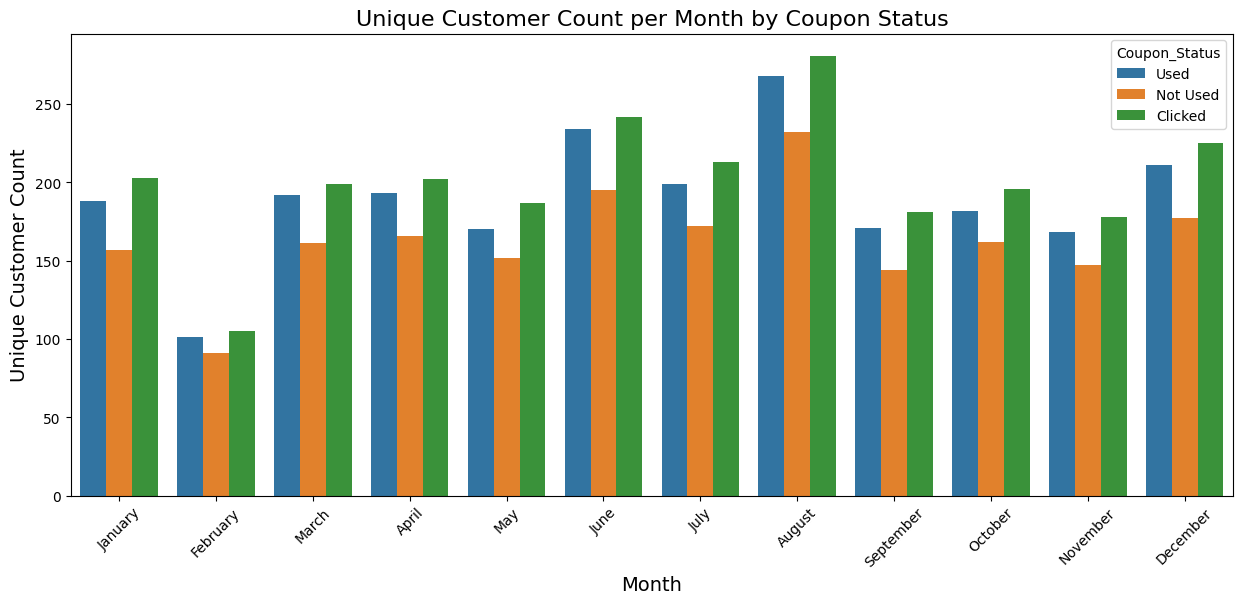

In [92]:
df= merged_cust_sales.groupby(['month','Coupon_Status'])['CustomerID'].nunique().reset_index(name='Count')

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'August', 'September', 'October', 'November', 'December'
]

# Convert 'month' to a categorical type with the defined order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df = df.sort_values(by='month').reset_index(drop=True)

plt.figure(figsize=(15, 6))
sns.barplot(data=df,x='month',y='Count',hue='Coupon_Status')
plt.title('Unique Customer Count per Month by Coupon Status', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Unique Customer Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

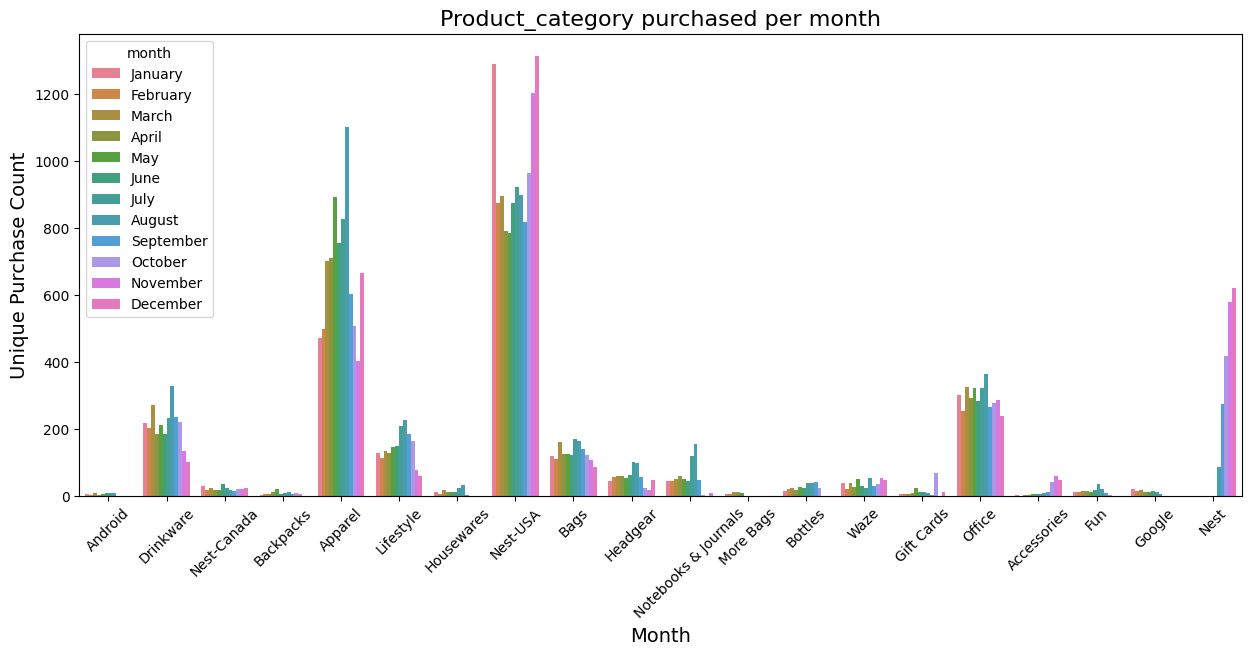

In [93]:
# product categories and their quanity purchased per month

df= merged_cust_sales.groupby(['Product_Category','month'])['Transaction_ID'].nunique().reset_index(name='Count')
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'August', 'September', 'October', 'November', 'December'
]

# Convert 'month' to a categorical type with the defined order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df = df.sort_values(by='month').reset_index(drop=True)

plt.figure(figsize=(15, 6))
sns.barplot(data=df,x='Product_Category',y='Count',hue='month')
plt.title('Product_category purchased per month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Unique Purchase Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [94]:
marketing.size

1095

### Marketing Analysis

In [95]:
# merge the sales and marketing for analysis

merged_sales_market = pd.merge(online_sales,marketing,how='left',left_on='Transaction_Date', right_on='Date')


# Converting date columns to datetime
merged_sales_market['Transaction_Date'] = pd.to_datetime(merged_sales_market['Transaction_Date'])

merged_sales_market = merged_sales_market.drop(columns=['Date'])

In [96]:
# Calucating the total sales

merged_sales_market['Total_Sales'] = merged_sales_market['Quantity']*merged_sales_market['Avg_Price']

df_total_sales= pd.DataFrame(merged_sales_market.groupby('Transaction_Date')['Total_Sales'].sum().reset_index())


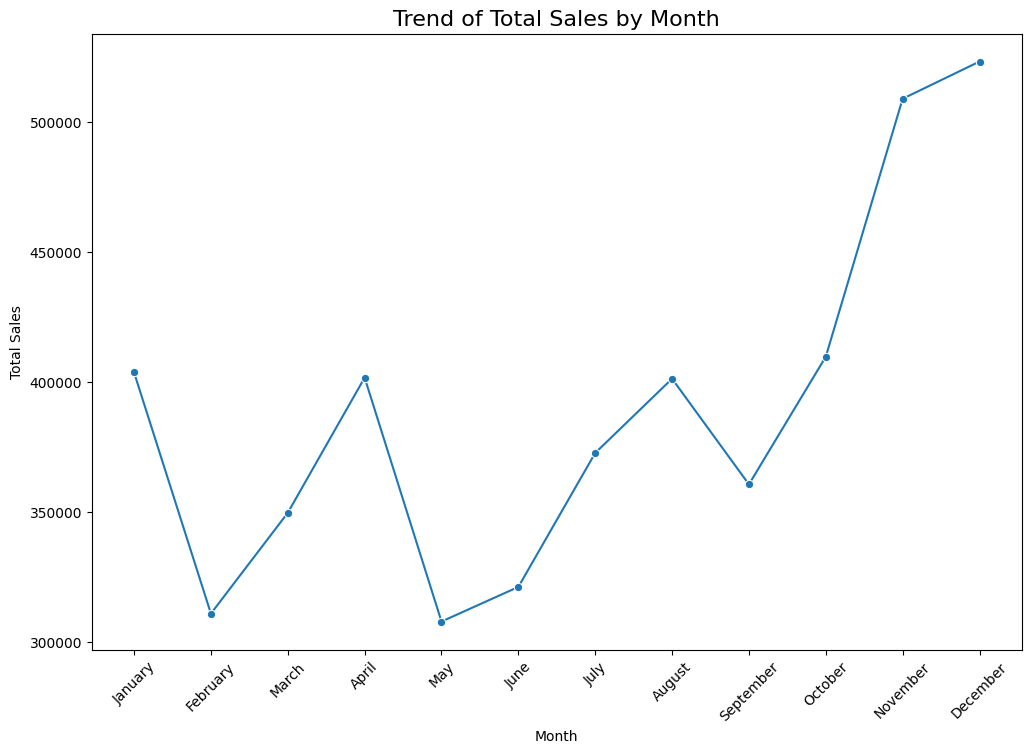

In [97]:
merged_sales_market['month']= merged_sales_market['Transaction_Date'].dt.month_name()

df= pd.DataFrame(merged_sales_market.groupby('month')['Total_Sales'].sum()).reset_index()#.sort_values(by='month',ascending=False)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'August', 'September', 'October', 'November', 'December'
]

# Convert 'month' to a categorical type with the defined order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df = df.sort_values(by='month').reset_index(drop=True)
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='month', y='Total_Sales', marker='o')
plt.title('Trend of Total Sales by Month',fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## Marketing spend and Revenue Correlation

In [98]:
# Converting date columns to datetime
df_total_sales['Transaction_Date'] = pd.to_datetime(df_total_sales['Transaction_Date'])
marketing['Date'] = pd.to_datetime(marketing['Date'])


df_sales_spend = pd.merge(df_total_sales,marketing,left_on='Transaction_Date', right_on='Date', how='left')
df_sales_spend.drop(columns={'Date'},inplace=True)
df_sales_spend.head()

,Transaction_Date,Total_Sales,Offline_Spend,Online_Spend
0,2019-01-01,7380.49,4500,2424.50
1,2019-01-02,13438.47,4500,3480.36
2,2019-01-03,23834.21,4500,1576.38
3,2019-01-04,16603.41,4500,2928.55
4,2019-01-05,17373.19,4500,4055.30


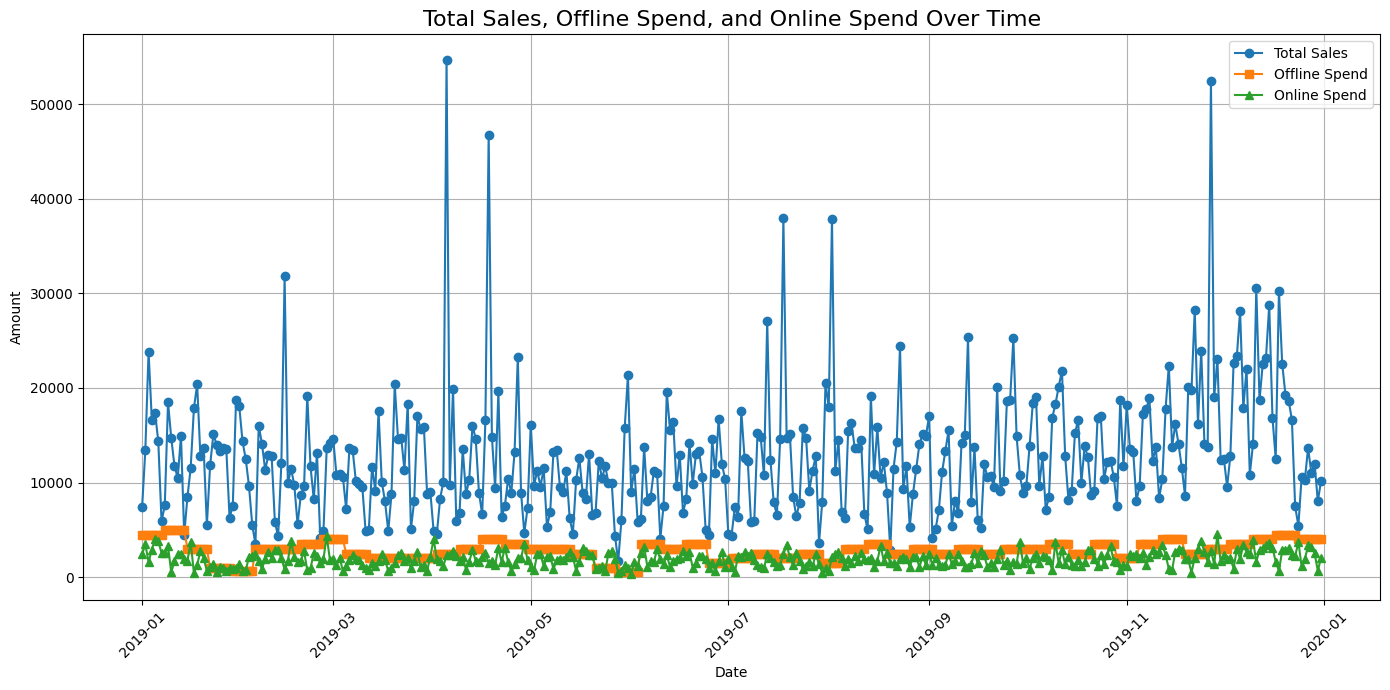

In [99]:
plt.figure(figsize=(14, 7))
plt.plot(df_sales_spend['Transaction_Date'], df_sales_spend['Total_Sales'], marker='o', label='Total Sales')
plt.plot(df_sales_spend['Transaction_Date'], df_sales_spend['Offline_Spend'], marker='s', label='Offline Spend')
plt.plot(df_sales_spend['Transaction_Date'], df_sales_spend['Online_Spend'], marker='^', label='Online Spend')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Total Sales, Offline Spend, and Online Spend Over Time',fontsize=16)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

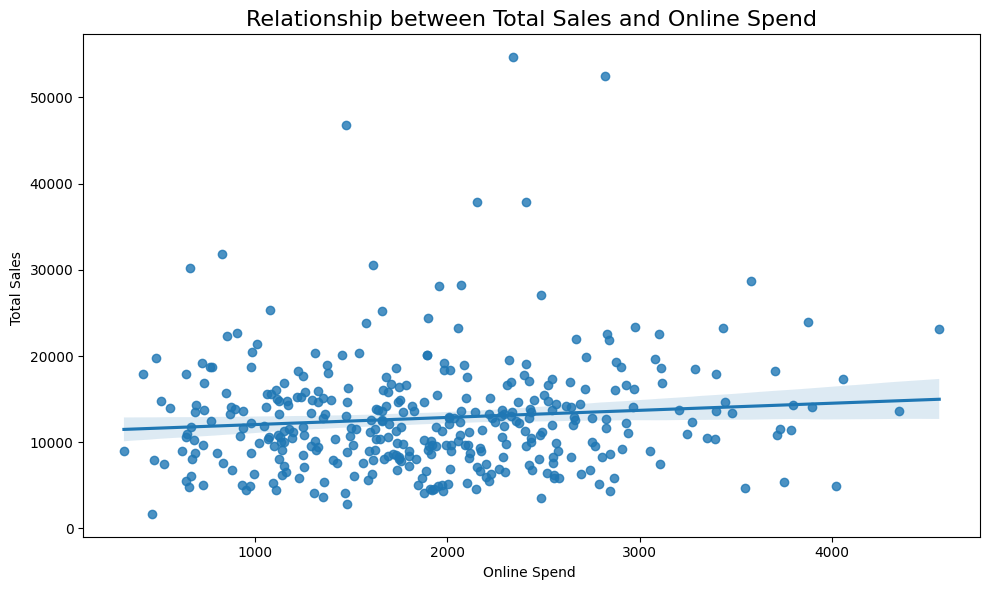

In [100]:
import scipy.stats as stats

# Plotting the relationship between Total Sales and Online Spend
plt.figure(figsize=(10, 6))
sns.regplot(x='Online_Spend', y='Total_Sales', data=df_sales_spend)

plt.xlabel('Online Spend ')
plt.ylabel('Total Sales ')
plt.title('Relationship between Total Sales and Online Spend',fontsize=16)
plt.tight_layout()
plt.show()



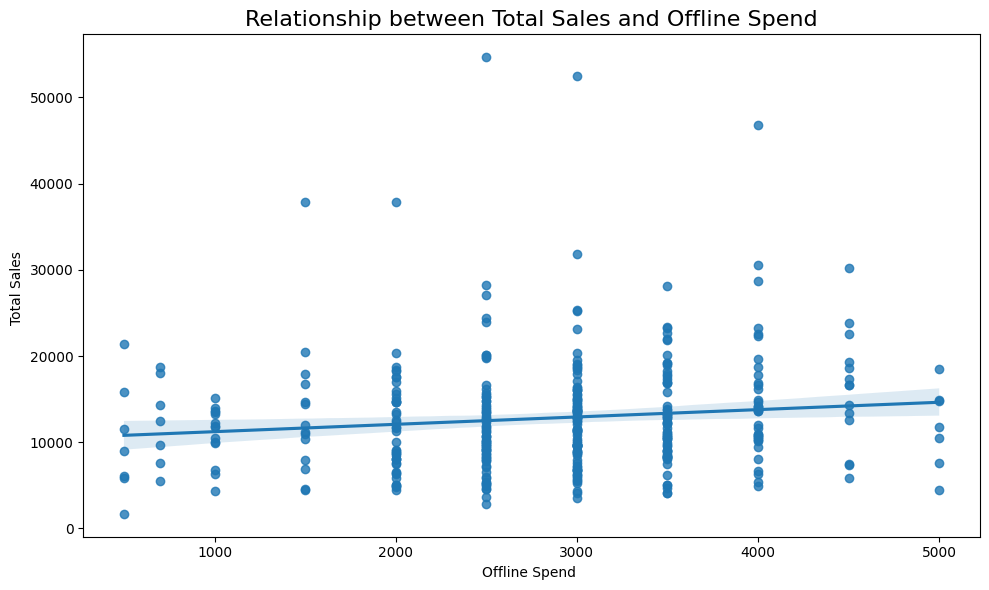

In [101]:

# Plotting the relationship between Total Sales and Offline Spend
plt.figure(figsize=(10, 6))
sns.regplot(x='Offline_Spend', y='Total_Sales', data=df_sales_spend)

plt.xlabel('Offline Spend ')
plt.ylabel('Total Sales ')
plt.title('Relationship between Total Sales and Offline Spend',fontsize=16)
plt.tight_layout()
plt.show()

In [102]:
# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(df_sales_spend['Online_Spend'], df_sales_spend['Total_Sales'])


print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: 0.10068294645850903
P-value: 0.05462675752189887


* **Null Hypothesis (H0)**: Online spend and total sales are not correlated (i.e., the correlation coefficient is equal to 0).
* **Alternative Hypothesis (H1)**: Online spend and total sales are correlated (i.e., the correlation coefficient is not equal to 0).


* if , **alpha = 0.05**, then with **p-value as 0.054** it is not possible to conclude anything . we need to have more samples or we have decrease alpha value.
* so. if **alpha 0.10** then, with the **p-value as 0.054** we can say that total_sales and online spend are corelated.


In [103]:
# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(df_sales_spend['Offline_Spend'], df_sales_spend['Total_Sales'])


print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: 0.12245369837572091
P-value: 0.019270124268795655


* **Null Hypothesis (H0)**: Offline spend and total sales are not correlated (i.e., the correlation coefficient is equal to 0).
* **Alternative Hypothesis (H1)**: Offline spend and total sales are correlated (i.e., the correlation coefficient is not equal to 0).

* if alpha = 0.05, then p-value as  0.019. we can say that p-value<alpha so, there is correlation between offline spend and total sales.

## Calucalting Invoice Value

In [104]:
online_sales['Transaction_Date']=pd.to_datetime(online_sales['Transaction_Date'])

online_sales['Month']= online_sales['Transaction_Date'].dt.strftime('%b')
online_sales['Total_Sales'] = online_sales['Quantity']*online_sales['Avg_Price']

In [105]:
# Mergeing the online_sales and discount and tax_amt
merged_sales_disc = pd.merge(online_sales,tax_amt,on='Product_Category',how='left')

merged_final = pd.merge(merged_sales_disc,discount,on=['Month','Product_Category'],how='left')


In [106]:
merged_final.isna().sum()

CustomerID               0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Month                    0
Total_Sales              0
GST                      0
Coupon_Code            400
Discount_pct           400
dtype: int64

In [107]:
merged_final[merged_final.isnull().any(axis=1)]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Total_Sales,GST,Coupon_Code,Discount_pct
62,17850,16704,2019-01-01,GGOEYOBR078599,YouTube Luggage Tag,Fun,4,9.27,6.50,Used,Jan,37.08,18%,NaN,NaN
95,14688,16742,2019-01-02,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,103.15,6.50,Clicked,Jan,103.15,10%,NaN,NaN
157,18074,16782,2019-01-02,GGOEGOBC078699,Google Luggage Tag,Fun,1,7.42,6.50,Used,Jan,7.42,18%,NaN,NaN
178,16029,16800,2019-01-02,GGOEAOBH078799,Android Luggage Tag,Fun,2,7.42,6.50,Not Used,Jan,14.84,18%,NaN,NaN
193,16250,16812,2019-01-02,GGOEGDHG082499,Google 25 oz Clear Stainless Steel Bottle,Google,1,11.54,17.96,Clicked,Jan,11.54,10%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44213,12472,42109,2019-10-30,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,79.99,6.00,Clicked,Oct,79.99,10%,NaN,NaN
45167,14911,42756,2019-11-07,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,79.99,6.00,Not Used,Nov,79.99,10%,NaN,NaN
45807,18125,43244,2019-11-12,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,99.99,6.00,Clicked,Nov,99.99,10%,NaN,NaN
46239,17180,43537,2019-11-15,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,79.99,6.00,Used,Nov,79.99,10%,NaN,NaN


* There are null values in coupon code and discount_pct.But this Null values can't be filled with any other values except zero because those product might not be having any discounts.
* for calucalating the Invoice Value this might be an issue.

In [108]:
# Fill NaN values in Discount_pct with 0
merged_final['Discount_pct'].fillna(0, inplace=True)

In [109]:
# Calucating Invoice

merged_final['GST'] = merged_final['GST'].str.replace('%','').astype('float')/100 # dividing for percentage -> number
merged_final['Discount_pct'] = merged_final['Discount_pct'].astype('float')/100

merged_final['Invoice_Value'] = ((merged_final['Total_Sales']) * (1-merged_final['Discount_pct']) * (1+ merged_final['GST'])) + merged_final['Delivery_Charges']

merged_final.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Total_Sales,GST,Coupon_Code,Discount_pct,Invoice_Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,153.71,0.10,ELEC10,0.1,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,153.71,0.10,ELEC10,0.1,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2.05,0.10,OFF10,0.1,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,87.65,0.18,SALE10,0.1,99.5843
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,16.50,0.18,AIO10,0.1,24.0230


In [110]:
merged_final['Invoice_Value'].isna().sum()

0

In [111]:
merged_final['Invoice_Value'].describe()

count    52924.000000
mean        89.080787
std        152.506512
min          4.375440
25%         18.545760
50%         40.683740
75%        123.447600
max       8979.275000
Name: Invoice_Value, dtype: float64

In [112]:
merged_final.groupby('CustomerID')['Invoice_Value'].describe().T

CustomerID,12346,12347,12348,12350,12356,12359,12370,12373,12377,12383,...,18233,18239,18245,18250,18256,18259,18260,18269,18277,18283
count,2.000000,60.000000,23.000000,17.000000,36.000000,16.000000,91.000000,14.000000,77.000000,69.000000,...,1.000,52.000000,55.000000,21.000000,4.000000,7.000000,40.000000,8.000000,1.00,102.000000
mean,87.490870,201.504930,65.301139,69.630232,48.706968,40.824405,74.175784,33.702746,127.897687,79.400123,...,82.615,122.754488,135.456912,102.396817,19.379560,116.629971,66.181008,19.457615,301.02,68.341228
std,5.686369,399.125255,91.239876,49.602933,52.816577,31.642358,94.663064,32.540210,172.396115,112.837743,...,NaN,149.637030,127.536548,69.158596,7.926796,117.424993,76.549082,5.568430,NaN,80.285422
min,83.470000,7.716600,7.643740,13.900960,8.310000,9.851520,7.056000,7.123700,8.631200,7.312160,...,82.615,8.677100,12.350760,15.251200,8.074100,17.534180,8.256650,9.648200,301.02,6.990000
25%,85.480435,18.986355,11.782000,21.310180,10.543770,18.913920,20.078800,11.468390,21.594560,15.705500,...,82.615,31.311875,24.452250,80.699000,17.342960,55.091880,17.151800,17.789060,301.02,15.581895
50%,87.490870,67.873090,15.801000,41.514140,15.866570,35.264000,31.667360,18.925490,69.350100,25.586800,...,82.615,87.185000,111.220000,89.770900,21.532180,106.695120,34.648590,18.258860,301.02,27.229380
75%,89.501305,138.867500,77.780870,123.447600,86.454555,43.948800,110.720000,40.319280,153.510000,123.810000,...,82.615,158.672900,215.500000,99.901000,23.568780,106.695120,75.789535,21.888380,301.02,94.500000
max,91.511740,1823.245700,286.322800,129.937600,196.250000,137.120000,704.192000,99.901000,1178.300000,595.050000,...,82.615,899.198000,475.220000,279.291000,26.379780,368.606500,372.520000,29.078120,301.02,359.430000


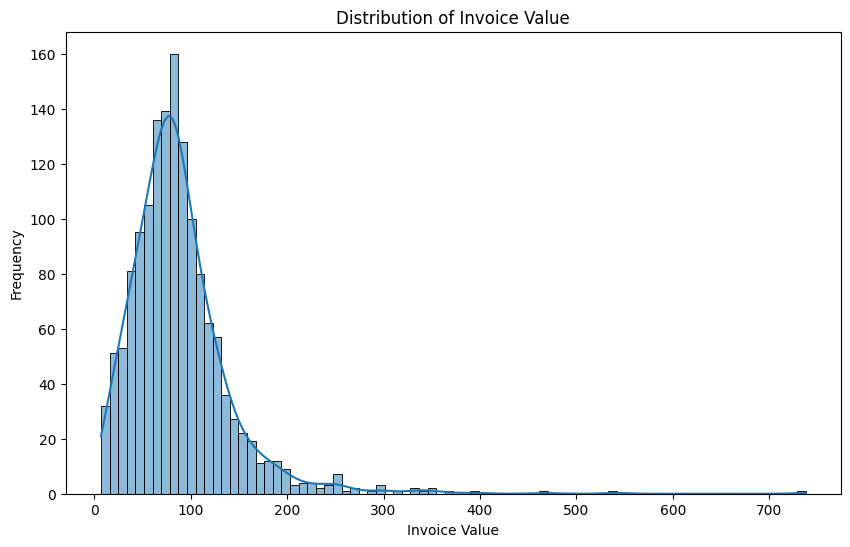

In [113]:
# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(merged_final.groupby('CustomerID')['Invoice_Value'].mean(), kde=True)
plt.title('Distribution of Invoice Value')
plt.xlabel('Invoice Value')
plt.ylabel('Frequency')
plt.show()

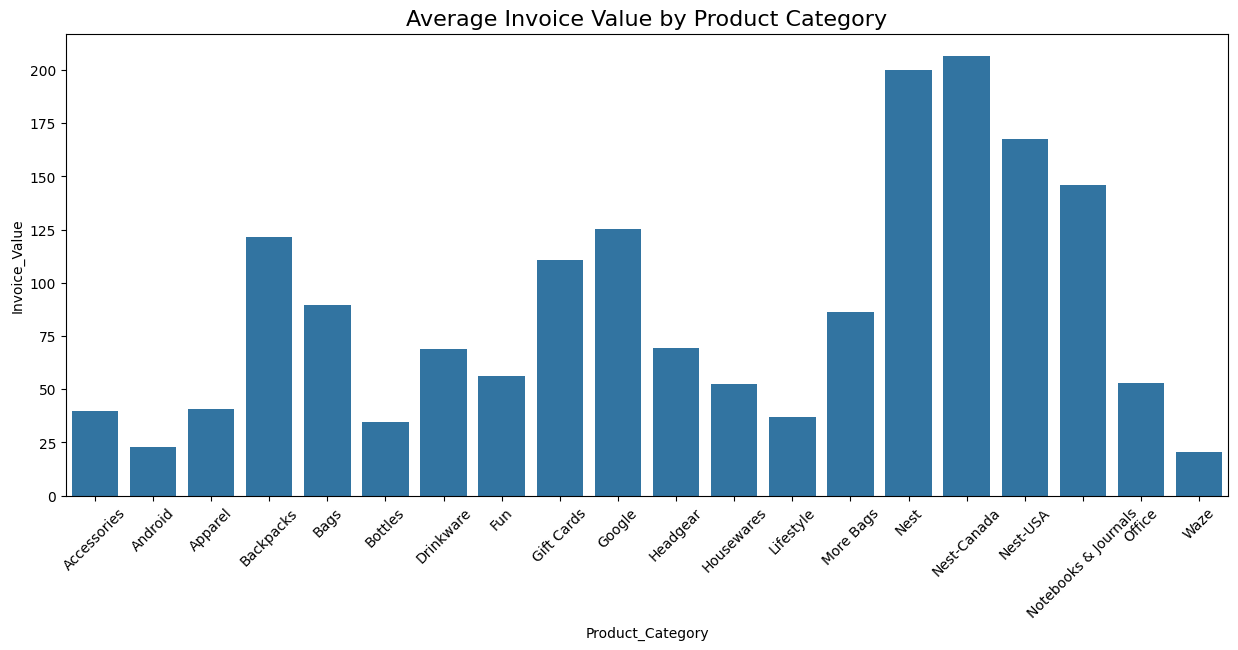

In [114]:
plt.figure(figsize=(15,6))
df= pd.DataFrame(merged_final.groupby('Product_Category')['Invoice_Value'].mean())
sns.barplot(data=df,x='Product_Category',y='Invoice_Value')
plt.title('Average Invoice Value by Product Category',fontsize=16)
plt.xticks(rotation=45)
plt.show()

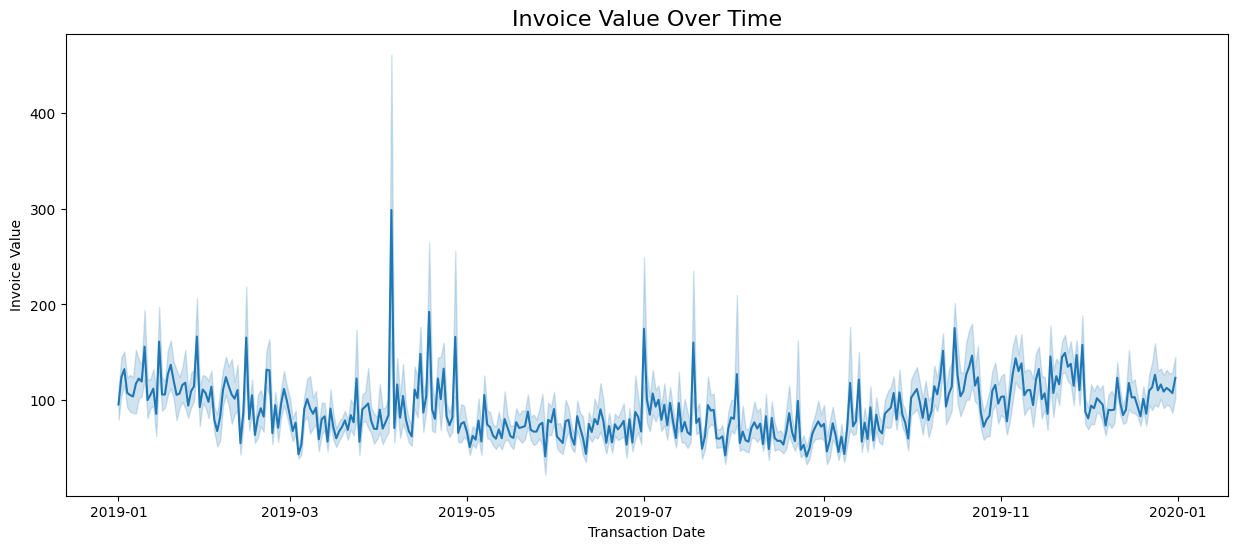

In [115]:
# Time series analysis
plt.figure(figsize=(15, 6))
sns.lineplot(x='Transaction_Date', y='Invoice_Value', data=merged_final)
plt.title('Invoice Value Over Time',fontsize=16)
plt.xlabel('Transaction Date')
plt.ylabel('Invoice Value')
plt.show()

## Key performance Indicators(KPI)

In [126]:
category_kpis = merged_final.groupby('Product_Category').agg({
    'Total_Sales': 'sum',
    'Transaction_ID': 'nunique',
    'Invoice_Value': 'sum'
}).reset_index()

category_kpis['Average_Order_Value'] = category_kpis['Invoice_Value'] / category_kpis['Transaction_ID']


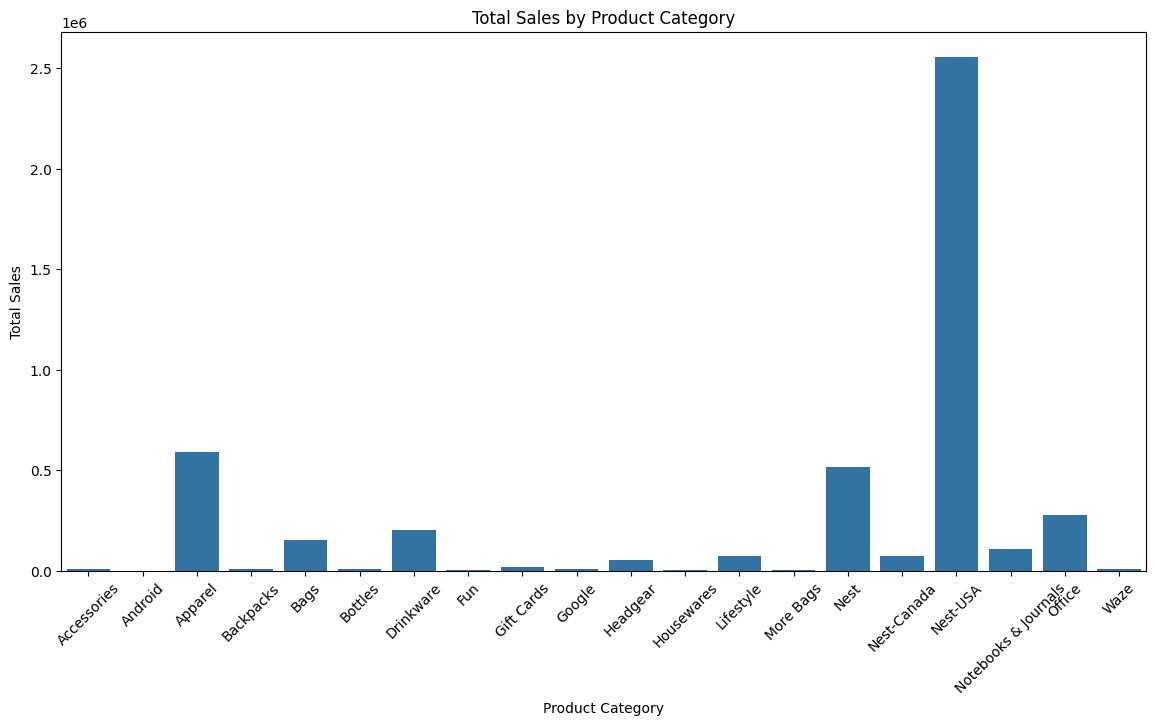

In [128]:
plt.figure(figsize=(14, 7))
sns.barplot(data=category_kpis, x='Product_Category', y='Total_Sales')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()




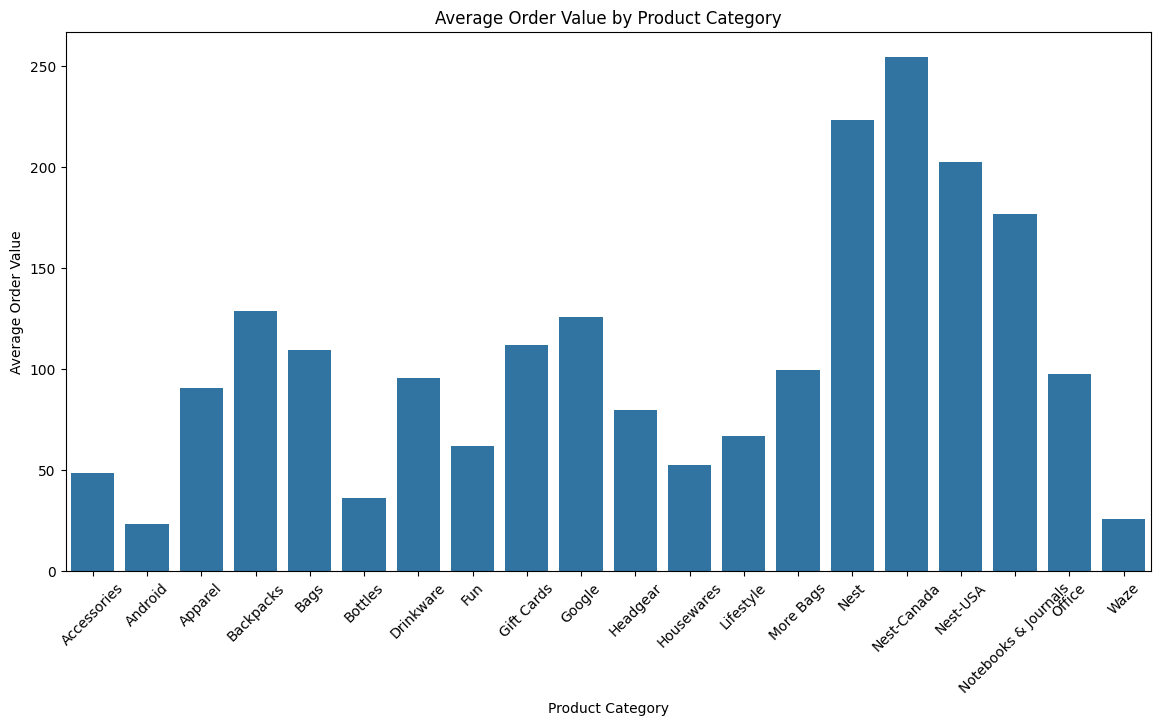

In [129]:
plt.figure(figsize=(14, 7))
sns.barplot(data=category_kpis, x='Product_Category', y='Average_Order_Value')
plt.title('Average Order Value by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.show()

## Cohort Analysis

In [117]:
merged_final['CohortMonth'] = merged_final['Transaction_Date'].dt.to_period('M')
merged_final['FirstOrder'] = merged_final.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')

In [118]:
df_cohort = merged_final.groupby(['FirstOrder', 'CohortMonth']).agg(No_of_customers=('CustomerID', 'nunique')).reset_index(drop=False)

In [119]:
# Finding the number of months between them
df_cohort['period_number'] = (df_cohort['CohortMonth'] - df_cohort['FirstOrder']).apply(attrgetter('n'))

In [120]:
df_cohort.head()

,FirstOrder,CohortMonth,No_of_customers,period_number
0,2019-01,2019-01,215,0
1,2019-01,2019-02,13,1
2,2019-01,2019-03,24,2
3,2019-01,2019-04,34,3
4,2019-01,2019-05,23,4


In [121]:
cohort_pivot = df_cohort.pivot_table(index='FirstOrder', columns='period_number', values='No_of_customers')

In [122]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11
FirstOrder,,,,,,,,,,,,
2019-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

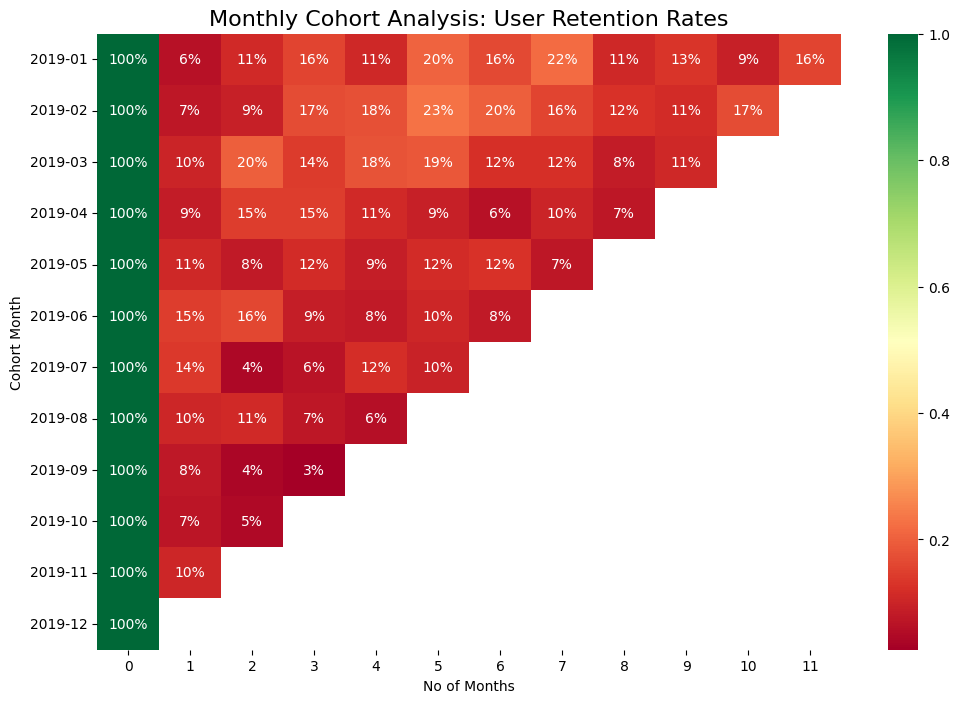

In [124]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='RdYlGn')
plt.title('Monthly Cohort Analysis: User Retention Rates',fontsize=16)
plt.xlabel('No of Months')
plt.ylabel('Cohort Month')
plt.show()

# Insights


---

* There are 63.62 percent are females and 36.37 percent Males in the provided data. Among them 31.60 percent are from california and 31.06 percent are from chicago and 22.07 percent are from New York and 10.14 are from New Jersey
and 8.1 percent are from Washington.
* There are outliers present in Quantity , AVg_price and Delivery charges columns but we chose to keep those because thse features depends on various categories like geography,psychography.hence the customers behaviour are different.
* Apparel and Next-USA are two more popular product categories among both male and female customers.And Andriod and more bags are two product categories are less popular among customers.
* The customers who are present in washington-DC are less n contrubution for number of customers but are more in product perchases.
* customers are  segmented based on the tenure i.e 0-2 months 2-6 months,6-12 months, 12-24 months , 24-36 months and 36- 50 months .This can provide deep insights into customer behavior and preferences at different stages of their purchase lifecycle.
* The customers are more in number in 36-50 months and least in 0-2 months.
* Number of Transcations decreased significantly from January to February and from their it gradually started to increase and gone to peek in December.
* Transactions in December are higher than any month this might because of chrismas or end of the year sale.
* There are good amount of unused coupons in every month.This may get expired and the coupon goes wasted.
* Nest-USA is the product category that is purchased more in the month of December.And Apparel is the product category that is purchaed more in the mid of the year .
* Total Sales dropped in month of feb and gradually picked up and again dropped in may and june and picked up high and gone to the peek in the  December.
* There is a strong correlation betweeen offfline spend and Total sales. And a strong correlation between online spend and Total sales.
* Average Invoice Value by Product Category in more in Nest ,Nest-canada,Nest-USA when compared to other products.
* there is a notable decline in the number of returning customers across cohorts as time progresses. For instance, in the 2019-01 cohort, the number of returning customers drops from 215 in the initial period to 34 by the 11th period.
* This trend is consistent across all cohorts, indicating a common pattern of customer attrition over time.
* KPI(key performance indicator) for Total sales in Nest-USA.And KPI for average order value is Nest-canada.
* Cohorts such as 2019-03 and 2019-06 show a higher level of retention in the initial periods compared to others.
* the cohorts starting at the beginning of the year (2019-01) and mid-year (2019-06) show higher initial volumes compared to later months. This could be due to seasonal trends or marketing efforts that vary throughout the year.



# Recommendations


---
* Given that 63.62% of your customers are female, consider tailoring your marketing messages to resonate more with this demographic.
* And with significant customer bases in California (31.60%), Chicago (31.06%), New York (22.07%), New Jersey (10.14%), and Washington (8.1%), create localized marketing campaigns that cater to the preferences and cultural nuances of these regions.
* The customer segments based on Tenure can help the marketing team to interact with the customers who are likely to churn. And to provide coupouns and VIP status to recognise and improve the loyalty.
* Increase efforts in targeted marketing campaigns to attract new customers.Offer attractive first-purchase discounts or incentives to encourage initial purchases.
* offer some discounts and some other sale festival during february month to keep the transactions up.
* Remind the customers at end of every month or when the coupoun code is about to get expired. so that customers may use this coupons.
* Plan regular promotions and special events throughout the year to maintain customer interest and drive consistent sales.
*  Implement retention strategies such as loyalty programs, personalized recommendations, and post-purchase follow-ups to encourage repeat purchases.
*  Focus offline marketing efforts on regions with higher customer concentration, such as California, Chicago, New York, New Jersey, and Washington. This ensures your offline spend reaches the most responsive audience.
* Identifying the KPIs provide clear, quantifiable metrics that allow businesses to measure performance against specific goals.KPIs help in optimal resource allocation by highlighting which areas are performing well and which need more attention.
* Implement targeted campaigns to re-engage customers at critical drop-off points (e.g., after period 3). Personalized offers, reminders, or loyalty programs can help retain customers longer.
* Plan marketing efforts around the identified seasonal trends. For instance, if early-year and mid-year cohorts show higher initial engagement, concentrate marketing and promotional efforts during these times to maximize initial customer acquisition.
* Offer retention incentives such as discounts, exclusive content, or early access to new products to customers who remain active beyond the third or fourth period. This can help reduce the significant drop-off seen in later periods.
* Collect feedback from customers who drop off to understand their reasons and address any issues. This can help in refining products or services.

